<a href="https://colab.research.google.com/github/Spandana2704/ML/blob/main/MLW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv("/content/diabetes_DT.csv")
df.shape

(768, 9)

In [49]:
df=df.drop_duplicates()

In [50]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [52]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [88]:
feature_cols=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [89]:
X=df[feature_cols]
y=df['Outcome']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [91]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6753246753246753


In [93]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

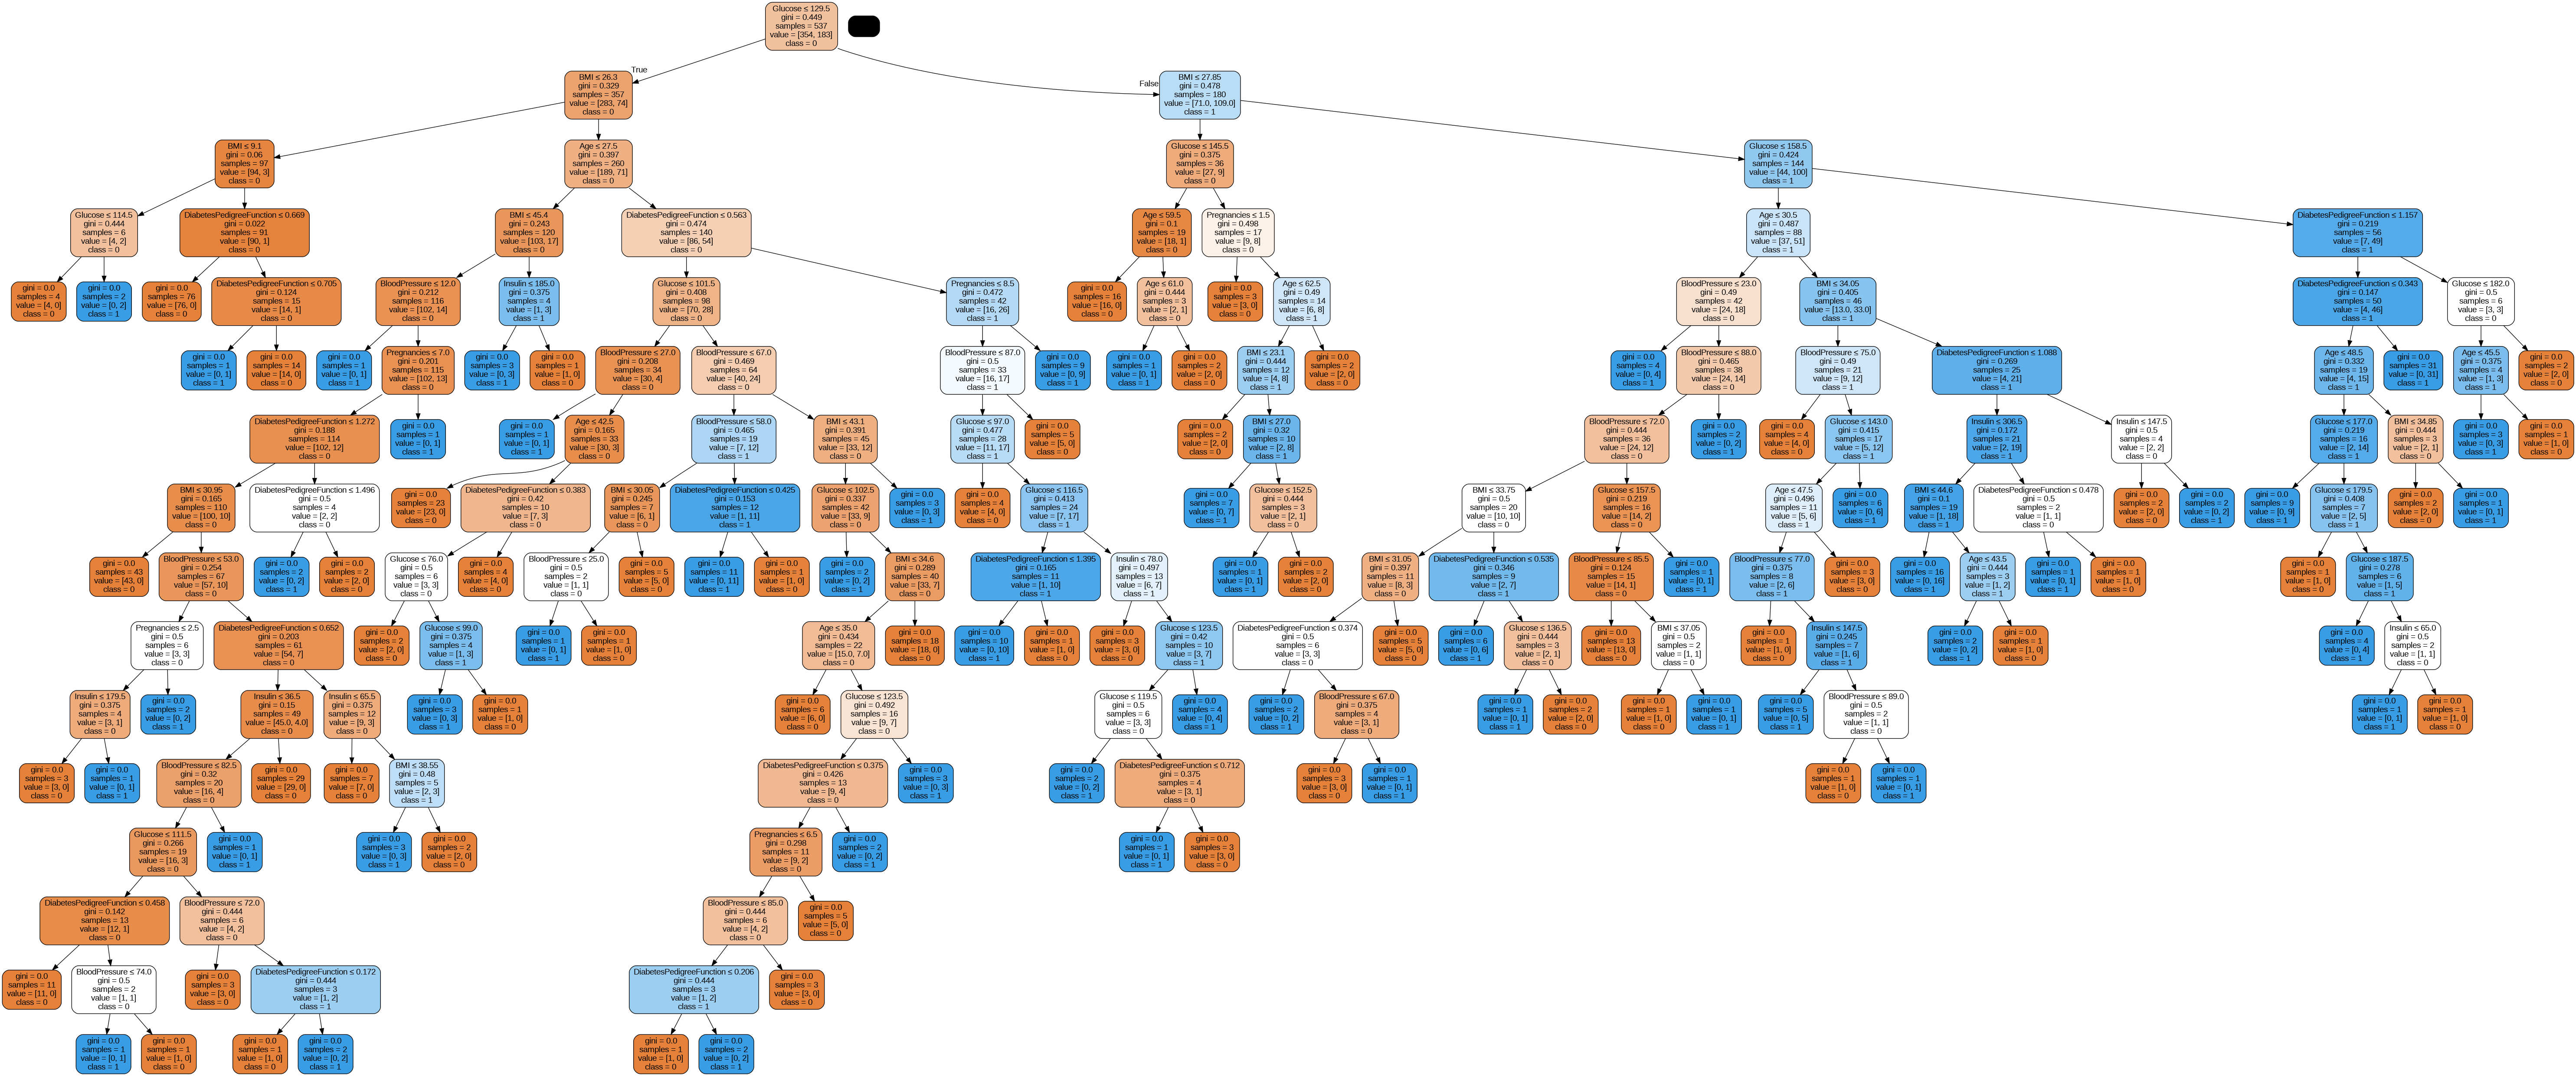

In [94]:
dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [95]:
clf=DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [96]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7532467532467533


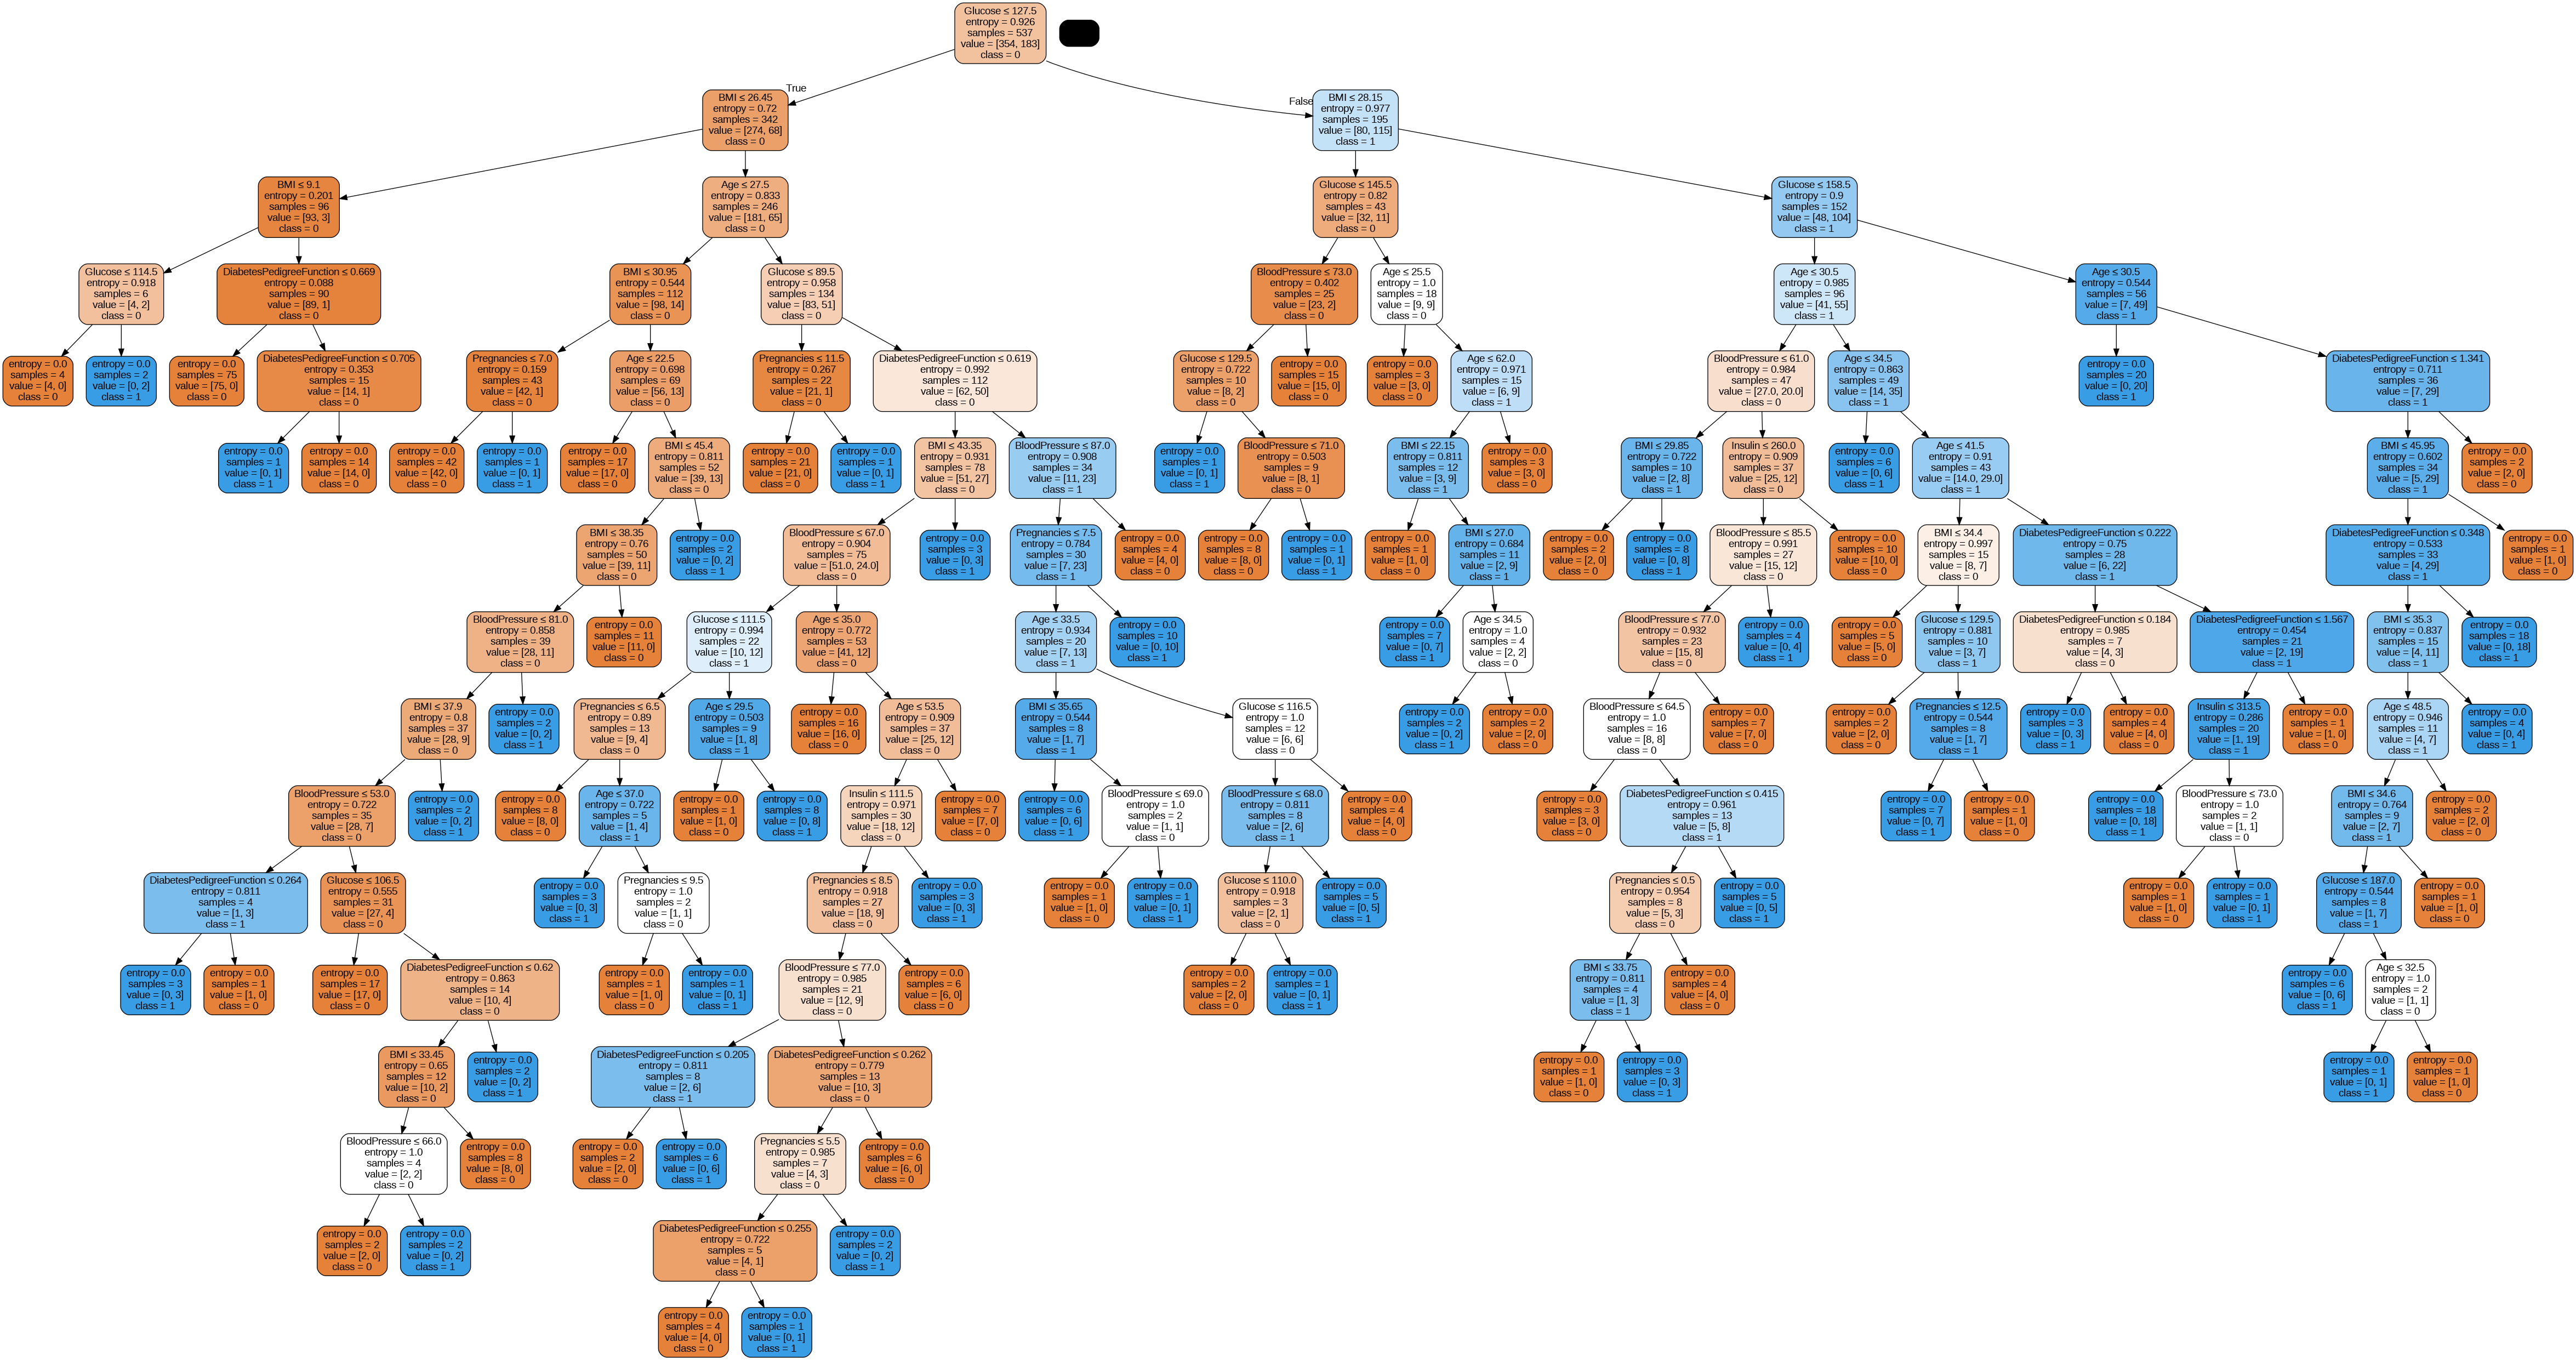

In [97]:
dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [99]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=100)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7748917748917749


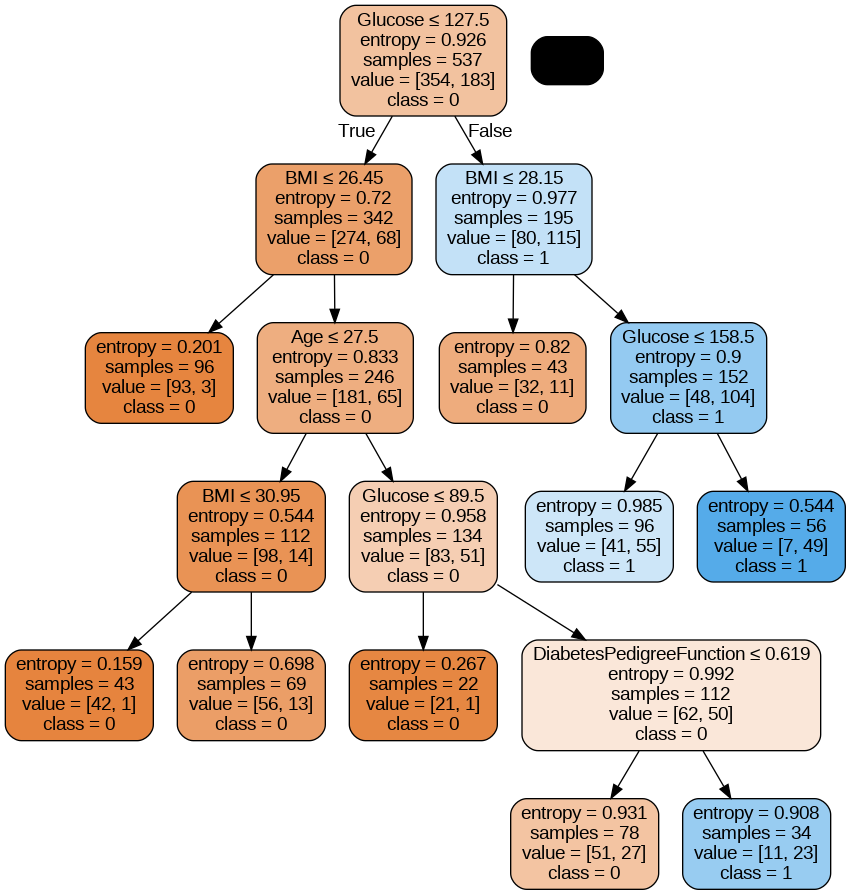

In [101]:
dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
df2=pd.read_csv('/content/Loan_default.csv')
df2.shape

(255347, 18)

In [77]:
df2=df2.drop_duplicates()

In [78]:
df2=df2.drop("LoanID",axis=1)

In [79]:
df2.shape

(255347, 17)

In [80]:
[col for col in df2.columns if df2[col].isnull().sum()>0]

[]

In [81]:
df2.dtypes

,0
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64
Education,object


In [82]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
le = LabelEncoder()
for col in categorical_cols:
    df2[col] = le.fit_transform(df2[col])

In [83]:
df2.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1


In [84]:
X=df2.drop(labels='Default',axis=1)
y=df2['Default']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [86]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8853469094706612
Confusion matrix:
 [[67758    23]
 [ 8760    64]]
